In [ ]:
!nvidia-smi

Thu Oct 31 12:10:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!nvcc -o MatrixMulCuda MatrixMulCuda.cu

In [ ]:
!./MatrixMulCuda

Threads: 1, Time: 61.8483 seconds
Threads: 4, Time: 20.8231 seconds
Threads: 16, Time: 9.00356 seconds
Threads: 64, Time: 6.24045 seconds
Threads: 256, Time: 2.62426 seconds
Threads: 1024, Time: 1.84238 seconds
Threads: 4096, Time: 1.3226e-05 seconds
Threads: 16384, Time: 2.023e-06 seconds


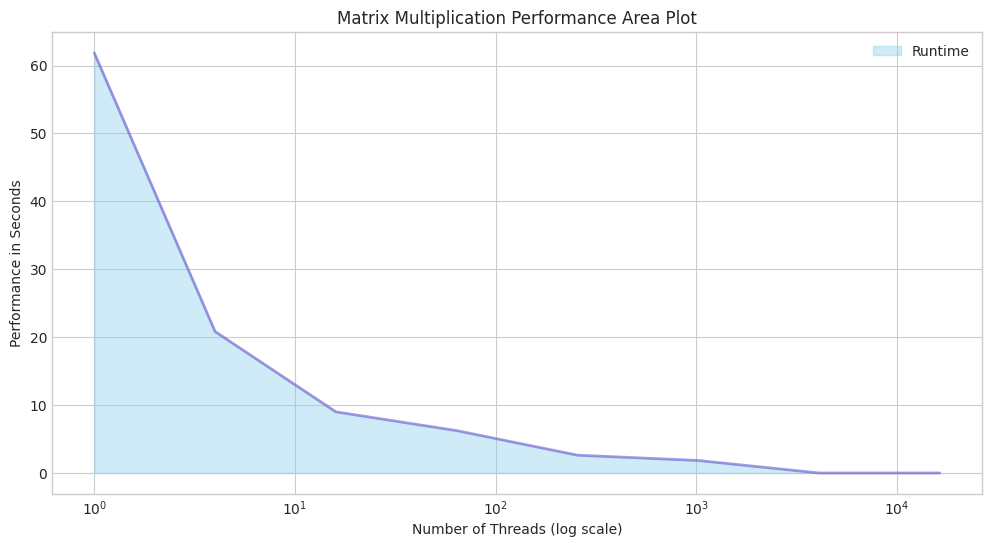

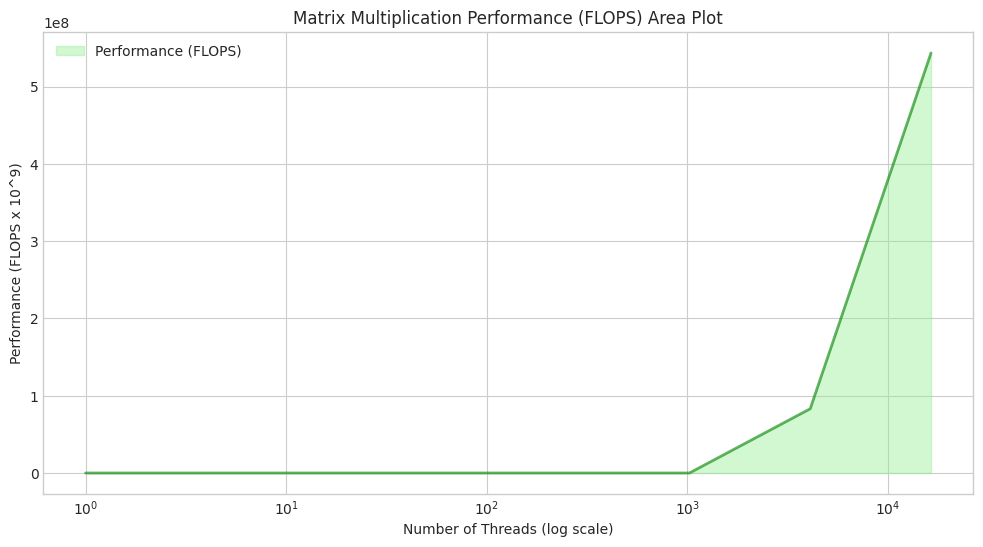

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
filename = 'performance.csv'
data = pd.read_csv(filename)

x = data['Threads'].values
y = data['Time'].values

plt.figure(figsize=(12, 6))
plt.fill_between(x, y, color="skyblue", alpha=0.4, label='Runtime')
plt.plot(x, y, color="Slateblue", alpha=0.6, linewidth=2)
plt.xscale('log')
plt.xlabel('Number of Threads (log scale)')
plt.ylabel('Performance in Seconds')
plt.title('Matrix Multiplication Performance Area Plot')
plt.legend()
plt.grid(True)
plt.show()

N = 8192
operations = 2 * (N ** 3)
performance = operations / (y * 1e9)

plt.figure(figsize=(12, 6))
plt.fill_between(x, performance, color="lightgreen", alpha=0.4, label='Performance (FLOPS)')
plt.plot(x, performance, color="green", alpha=0.6, linewidth=2)
plt.xscale('log')
plt.xlabel('Number of Threads (log scale)')
plt.ylabel('Performance (FLOPS x 10^9)')
plt.title('Matrix Multiplication Performance (FLOPS) Area Plot')
plt.legend()
plt.grid(True)
plt.show()
